# UFC Query Lab: SQL Driven Visuals

## Step 0: Loading Dependencies

In [105]:
#importing core dependencies
import pandas as pd
import numpy as np

#importing visualisation dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

print("imported pandas, numpy, matplotlib, seaborn and plotly successfully.")

imported pandas, numpy, matplotlib, seaborn and plotly successfully.


## Step 1: Data Ingestion

In [ ]:
#importing csv files
fighters = pd.read_csv("fighter_details.csv",
                        encoding_errors = 'ignore', 
                        on_bad_lines = 'skip') 

fights = pd.read_csv("fight_details.csv",
                        encoding_errors = 'ignore', 
                        on_bad_lines = 'skip') 

events = pd.read_csv("event_details.csv",
                        encoding_errors = 'ignore', 
                        on_bad_lines = 'skip') 


### Step 1(a): Initial Data Exploration

In [4]:
fighters.head()

,id,name,nick_name,wins,losses,draws,height,weight,reach,stance,dob,splm,str_acc,sapm,str_def,td_avg,td_avg_acc,td_def,sub_avg
0,231926533134ec1f,Justin Buchholz,NaN,15,10,0,182.88,70.31,185.42,Orthodox,"Aug 22, 1983",2.35,26,4.14,51,0.00,0,33,0.8
1,f782f953bfe7b5f2,Jonathan Micallef,The Captain,8,1,0,182.88,77.11,195.58,Southpaw,"Mar 05, 1999",4.77,43,4.00,58,0.83,50,50,0.8
2,2e04a3b4a2011b97,Roland Payne,NaN,0,1,0,175.26,92.99,NaN,Orthodox,NaN,0.00,0,0.00,0,0.00,0,0,0.0
3,29f935654825331b,Chris Sanford,NaN,5,1,0,180.34,83.91,NaN,Orthodox,"Mar 12, 1968",0.23,50,3.22,17,0.00,0,0,3.5
4,15df64c02b6b0fde,Danny Abbadi,The Assassin,4,6,0,180.34,70.31,NaN,Orthodox,"Jul 03, 1983",3.29,38,4.41,57,0.00,0,77,0.0


In [5]:
fighters.shape

(2606, 19)

In [6]:
fights.head()

,event_name,event_id,fight_id,r_name,r_id,b_name,b_id,division,title_fight,method,...,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per
0,UFC 319: Du Plessis vs. Chimaev,421ccfc6ddb17958,82338ba457fbe87f,Tim Elliott,c96d9178c9ed9e62,Kai Asakura,d33da8a3d82bdb62,flyweight,0,Submission,...,NaN,0.0,0.0,NaN,80.0,14.0,4.0,100.0,0.0,0.0
1,UFC 319: Du Plessis vs. Chimaev,421ccfc6ddb17958,1d8dc0fb5d47357f,Chase Hooper,971246648e162f0d,Alexander Hernandez,262a7d06203657e6,lightweight,0,KO/TKO,...,NaN,4.0,5.0,80.0,82.0,17.0,0.0,76.0,0.0,23.0
2,UFC 319: Du Plessis vs. Chimaev,421ccfc6ddb17958,5b880d10b0ed7acc,Gerald Meerschaert,6ac9bc2953c47345,Michal Oleksiejczuk,0d65c432720accb9,middleweight,0,KO/TKO,...,NaN,12.0,20.0,60.0,78.0,21.0,0.0,47.0,0.0,52.0
3,UFC 319: Du Plessis vs. Chimaev,421ccfc6ddb17958,42585ce706c086de,Geoff Neal,b997be68943010fc,Carlos Prates,7ee0fd831c0fe7c3,welterweight,0,KO/TKO,...,0.0,0.0,0.0,NaN,53.0,25.0,21.0,100.0,0.0,0.0
4,UFC 319: Du Plessis vs. Chimaev,421ccfc6ddb17958,12cedec11b37ddc0,Dricus Du Plessis,0d7b51c9d2649a6e,Khamzat Chimaev,767755fd74662dbf,middleweight,1,Decision - Unanimous,...,NaN,25.0,28.0,89.0,75.0,8.0,16.0,32.0,0.0,67.0


In [7]:
fights.shape

(8312, 86)

In [8]:
events.head()

,event_id,fight_id,date,location,winner,winner_id
0,421ccfc6ddb17958,12cedec11b37ddc0,"August 16, 2025","Chicago, Illinois, USA",Khamzat Chimaev,767755fd74662dbf
1,421ccfc6ddb17958,9fa6a029f7f8241c,"August 16, 2025","Chicago, Illinois, USA",Lerone Murphy,396fe87b84ac2e1c
2,421ccfc6ddb17958,42585ce706c086de,"August 16, 2025","Chicago, Illinois, USA",Carlos Prates,7ee0fd831c0fe7c3
3,421ccfc6ddb17958,9939d7073462e07e,"August 16, 2025","Chicago, Illinois, USA",Michael Page,a67d071163962af8
4,421ccfc6ddb17958,82338ba457fbe87f,"August 16, 2025","Chicago, Illinois, USA",Tim Elliott,c96d9178c9ed9e62


In [9]:
events.shape

(8312, 6)

## Step 2: Data Cleaning

### Step 2(a): Treating Null Values

In [10]:
#checking null values in Fighters
print("missing values in Fighters:\n", fighters.isna().sum())

missing values in Fighters:
 id              0
name            0
nick_name     918
wins            0
losses          0
draws           0
height         21
weight         18
reach         655
stance         77
dob           156
splm            0
str_acc         0
sapm            0
str_def         0
td_avg          0
td_avg_acc      0
td_def          0
sub_avg         0
dtype: int64


In [11]:
#treating null values in Fighters
fighters['nick_name'] = fighters['nick_name'].fillna('Unknown')
fighters['stance'] = fighters['stance'].fillna('Unknown')
fighters["dob"] = fighters["dob"].fillna(pd.NaT)  # pd.NaT = missing datetime

In [ ]:
# Note on missing values in stance, height, and weight:
# These columns were intentionally left untreated.
# - Stance: Missing values were kept as NULL because assigning a default category (e.g., "Unknown") could introduce a false fighting style. 
# - Height & Weight: These are critical physical stats tied to weight classes. 
# Dropping fighters with missing values would remove valid fights from the dataset and break referential integrity. Imputing (e.g., using medians) could distort weight-class analyses. 
# Decision: Keep missing values as NULL to preserve both data integrity and analytical accuracy.

In [13]:
#verifying changes in Fighters
print("missing values in Fighters:\n", fighters.isna().sum())

missing values in Fighters:
 id              0
name            0
nick_name       0
wins            0
losses          0
draws           0
height         21
weight         18
reach         655
stance          0
dob           156
splm            0
str_acc         0
sapm            0
str_def         0
td_avg          0
td_avg_acc      0
td_def          0
sub_avg         0
dtype: int64


In [28]:
#checking null values in Fights
print("missing values in Fights:\n", fights.isna().sum())

missing values in Fights:
 event_name              0
event_id                0
fight_id                0
r_name                  0
r_id                    0
                       ..
b_landed_body_per      21
b_landed_leg_per       21
b_landed_dist_per      21
b_landed_clinch_per    21
b_landed_ground_per    21
Length: 86, dtype: int64


In [ ]:
# Note on missing values in fight-level stats:
# Some detailed columns (e.g., b_landed_body_per, b_landed_leg_per) have a small number of missing values (~21 each). 
# Decision: Rows were not dropped, and values were not imputed. Missing stats are preserved as NULL to retain all fight records and avoid introducing artificial data.

In [29]:
#checking null values in Events
print("missing values in Events:\n", events.isna().sum())

missing values in Events:
 event_id       0
fight_id       0
date           0
location       0
winner       147
winner_id    147
dtype: int64


In [30]:
# Note on missing values in Events:
# The 'winner' and 'winner_id' columns have 147 missing values. 
# These correspond to fights without a declared winner (e.g., draws, no contests, or unrecorded outcomes). 
# Decision: Rows were not dropped, and missing winners were preserved as NULL to maintain the integrity of fight history without forcing artificial labels.

### Step 2(b): Checking for Duplicate Values

In [31]:
#checking duplicates in Fighters
fighters.duplicated().sum()

np.int64(0)

In [32]:
#checking duplicates in Fights
fights.duplicated().sum()

np.int64(0)

In [33]:
#checking duplicates in Events
events.duplicated().sum()

np.int64(0)

### Step 2(c): Treating Data Types: Typecasting

In [43]:
#checking data types of Fighters
fighters.dtypes

id             object
name           object
nick_name      object
wins            int64
losses          int64
draws           int64
height        float64
weight        float64
reach         float64
stance         object
dob            object
splm          float64
str_acc         int64
sapm          float64
str_def         int64
td_avg        float64
td_avg_acc      int64
td_def          int64
sub_avg       float64
dtype: object

In [48]:
fighters['dob'] = pd.to_datetime(fighters['dob'])
fighters['stance'] = fighters['stance'].astype('category')

In [46]:
#checking data types of Fights
fights.dtypes

event_name              object
event_id                object
fight_id                object
r_name                  object
r_id                    object
                        ...   
b_landed_body_per      float64
b_landed_leg_per       float64
b_landed_dist_per      float64
b_landed_clinch_per    float64
b_landed_ground_per    float64
Length: 86, dtype: object

In [47]:
#checking data types of Events
events.dtypes

event_id     object
fight_id     object
date         object
location     object
winner       object
winner_id    object
dtype: object

In [49]:
events['date'] = pd.to_datetime(events['date'])

## Step 3: Feature Engineering

### Step 3(a): Deriving the  Weightclasses of the Fighters

In [61]:
#deriving weightclass of the Fighters
def classify_weight_class(weight):
    if weight <= 56.7:
        return "Flyweight"
    elif weight <= 61.2:
        return "Bantamweight"
    elif weight <= 65.8:
        return "Featherweight"
    elif weight <= 70.3:
        return "Lightweight"
    elif weight <= 77.1:
        return "Welterweight"
    elif weight <= 83.9:
        return "Middleweight"
    elif weight <= 93.0:
        return "Light Heavyweight"
    elif weight <= 120.2:
        return "Heavyweight"
    else:
        return "Super Heavyweight"

fighters["weight_class"] = fighters["weight"].apply(classify_weight_class)
print("code ran successfully.")

code ran successfully.


In [62]:
print(fighters[["name", "weight", "weight_class"]].head(20))

                 name  weight       weight_class
0     Justin Buchholz   70.31       Welterweight
1   Jonathan Micallef   77.11       Middleweight
2        Roland Payne   92.99  Light Heavyweight
3       Chris Sanford   83.91  Light Heavyweight
4        Danny Abbadi   70.31       Welterweight
5       Dominick Cruz   61.23      Featherweight
6      Roberto Romero   65.77      Featherweight
7           Nick Diaz   77.11       Middleweight
8       Austin Arnett   65.77      Featherweight
9          Aspen Ladd   61.23      Featherweight
10  Jorge de Oliveira   70.31       Welterweight
11     Abus Magomedov   83.91  Light Heavyweight
12         Joe Vedepo   83.91  Light Heavyweight
13      Casey O'Neill   56.70          Flyweight
14   Daniel Zellhuber   70.31       Welterweight
15       Jessin Ayari   70.31       Welterweight
16   Charles McCarthy   83.91  Light Heavyweight
17       Denise Gomes   52.16          Flyweight
18         Bill Algeo   65.77      Featherweight
19   Marco Polo Reye

### Step 3(b): Determining the Current Age of Fighters

In [63]:
#determining the current age of Fighters
fighters['age'] = 2025 - fighters['dob'].dt.year

In [64]:
fighters.head(5)

,id,name,nick_name,wins,losses,draws,height,weight,reach,stance,...,splm,str_acc,sapm,str_def,td_avg,td_avg_acc,td_def,sub_avg,weight_class,age
0,231926533134ec1f,Justin Buchholz,Unknown,15,10,0,182.88,70.31,185.42,Orthodox,...,2.35,26,4.14,51,0.00,0,33,0.8,Welterweight,42.0
1,f782f953bfe7b5f2,Jonathan Micallef,The Captain,8,1,0,182.88,77.11,195.58,Southpaw,...,4.77,43,4.00,58,0.83,50,50,0.8,Middleweight,26.0
2,2e04a3b4a2011b97,Roland Payne,Unknown,0,1,0,175.26,92.99,NaN,Orthodox,...,0.00,0,0.00,0,0.00,0,0,0.0,Light Heavyweight,NaN
3,29f935654825331b,Chris Sanford,Unknown,5,1,0,180.34,83.91,NaN,Orthodox,...,0.23,50,3.22,17,0.00,0,0,3.5,Light Heavyweight,57.0
4,15df64c02b6b0fde,Danny Abbadi,The Assassin,4,6,0,180.34,70.31,NaN,Orthodox,...,3.29,38,4.41,57,0.00,0,77,0.0,Welterweight,42.0


### Step 3(c): Extracting Year and Month from the Event Date 

In [67]:
#extracting year and month from the event date
events["event_year"] = events["date"].dt.year
events["event_month"] = events["date"].dt.month

### Step 3(d): Determining Win-Ratios of the Fighters

In [68]:
#determining win-ratios of the Fighters
fighters['win_ratio'] = fighters['wins'] / (fighters['wins'] + fighters['losses'])

### Step 3(e): Determining the Experience of the Fighters

In [ ]:
#determining the Fighters' experiences(number of matches)
fighters["experience"] = fighters["wins"] + fighters["losses"] + fighters["draws"]

## Step 4: Exporting Cleaned Data

In [70]:
#exporting cleaned csv(s)
fighters.to_csv("cleaned_fighters.csv", index=False)
events.to_csv("cleaned_events.csv", index=False)
fights.to_csv("cleaned_fights.csv", index=False)

## Step 5: Connecting to PostgreSQL

In [ ]:
#connecting to PostgreSQL
import psycopg2
conn = psycopg2.connect(
    host="localhost",
    port=5432(default port),
    dbname="db_name",
    user="username",
    password="password"
)

## Step 7: Data Visualisation 

### Step 7(a): Visualising Query 1 

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/1827572280.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Text(0, 0.5, 'Finish Method')

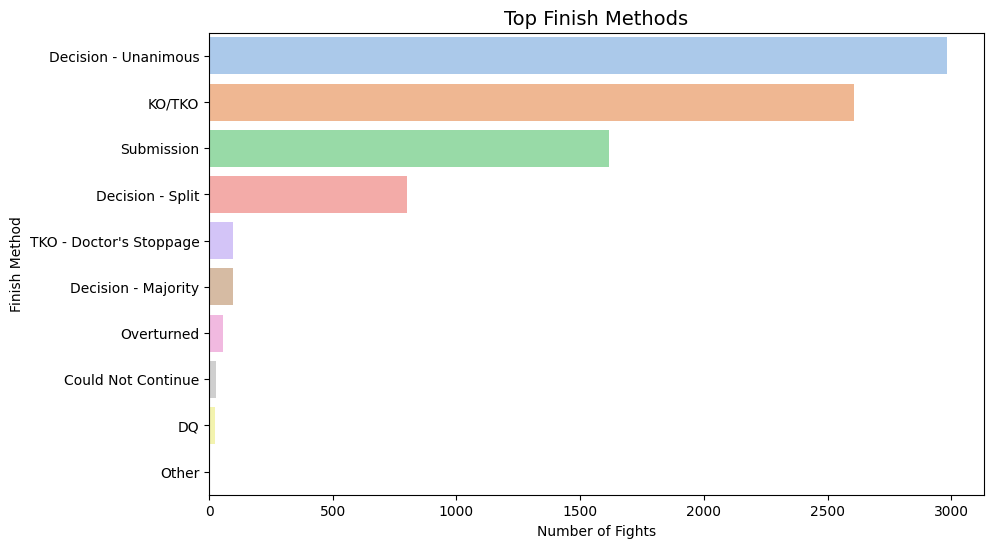

In [ ]:
# Query 1: Most Common Finishes (Seaborn)
query1 = """
SELECT method, COUNT(*) AS count
FROM fights
GROUP BY method
ORDER BY count DESC
LIMIT 20;
"""
df1 = pd.read_sql(query1, conn)

plt.figure(figsize=(10,6))
sns.barplot(df1, y = 'method', x = 'count', hue = 'method', palette = 'pastel')
plt.title("Top Finish Methods", fontsize=14)
plt.xlabel("Number of Fights")
plt.ylabel("Finish Method")

In [ ]:
# Query 1: Most Common Finishes (Plotly)
query1 = """
SELECT method, 
       COUNT(*) AS count
FROM fights
GROUP BY method
ORDER BY count DESC
LIMIT 20;
"""
df1 = pd.read_sql(query1, conn)

fig1 = px.bar(
    df1, x = 'method', y = 'count',
    title='Top Finish Methods',
    color = 'count',
    color_continuous_scale = px.colors.sequential.Viridis
)

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/410393330.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Step 7(b): Visualising Query 2

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/685820061.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



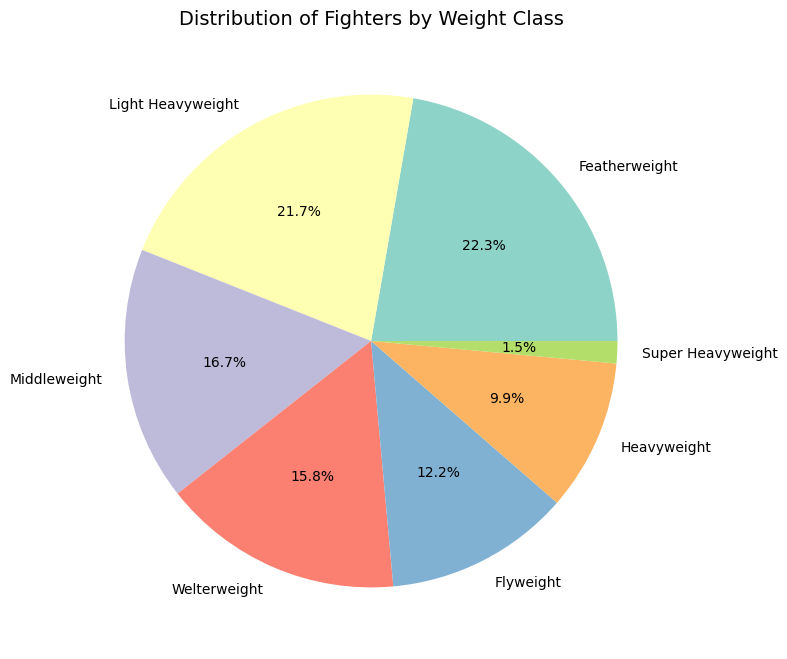

In [ ]:
# Query 2: Distribution of Fighters by Weight Class (Seaborn)
query2 = """
SELECT COALESCE(weight_class, 'Unknown') AS weight_class,
       COUNT(*) AS n_fighters
FROM fighters
GROUP BY COALESCE(weight_class, 'Unknown')
ORDER BY n_fighters DESC;
"""
df2 = pd.read_sql(query2, conn)

plt.figure(figsize=(8,8))
colors = sns.color_palette('Set3', len(df2))
plt.pie(df2['n_fighters'], labels = df2['weight_class'], autopct = '%1.1f%%', colors = colors)
plt.title('Distribution of Fighters by Weight Class', fontsize=14)

In [ ]:
# Query 2: Distribution of Fighters by Weight Class (Plotly)
query2 = """
SELECT COALESCE(weight_class, 'Unknown') AS weight_class,
       COUNT(*) AS n_fighters
FROM fighters
GROUP BY COALESCE(weight_class, 'Unknown')
ORDER BY n_fighters DESC;
"""
df2 = pd.read_sql(query2, conn)

fig2 = px.pie(
    df2, names = 'weight_class', values = 'n_fighters',
    title = 'Distribution of Fighters by Weight Class',
    color_discrete_sequence = px.colors.qualitative.Set3
)


/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/3467951097.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Step 7(c): Visualising Query 3

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/619628706.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Text(0, 0.5, 'Fighter')

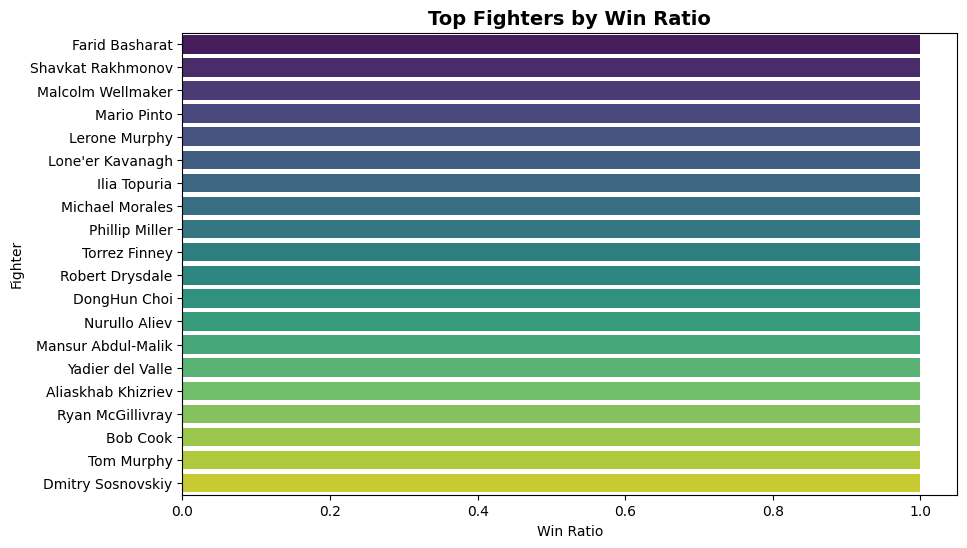

In [ ]:
# Query 3: Top Fighters by Win Ratio (Seaborn)
query3 = """
SELECT id, name, experience, win_ratio
FROM fighters
WHERE COALESCE(experience,0) >= 5
ORDER BY win_ratio DESC
LIMIT 20;
"""
df3 = pd.read_sql(query3, conn)

plt.figure(figsize=(10,6))
sns.barplot(df3, x = 'win_ratio', y = 'name', hue = 'name', palette = 'viridis')
plt.title('Top Fighters by Win Ratio', fontsize = 14, weight ='bold')
plt.xlabel('Win Ratio')
plt.ylabel('Fighter')

In [ ]:
# Query 3: Top Fighters by Win Ratio (Plotly)
query3 = """
SELECT id, name, experience, win_ratio
FROM fighters
WHERE COALESCE(experience,0) >= 5
ORDER BY win_ratio DESC
LIMIT 20;
"""
df3 = pd.read_sql(query3, conn)


fig3 = px.bar(
    df3.sort_values('win_ratio', ascending = True),  
    x = 'win_ratio',
    y = 'name',
    orientation = 'h',
    color = 'experience',
    color_continuous_scale = px.colors.sequential.Magma,  
    title = 'Top Fighters by Win Ratio'
)

fig3.update_layout(
    xaxis_title = 'Win Ratio',
    yaxis_title = 'Fighter',
    template = 'plotly_white',
    height=700
)


/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/1602923411.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Step 7(d): Visualising Query 4

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/4093786934.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Text(0, 0.5, 'Number of Fights')

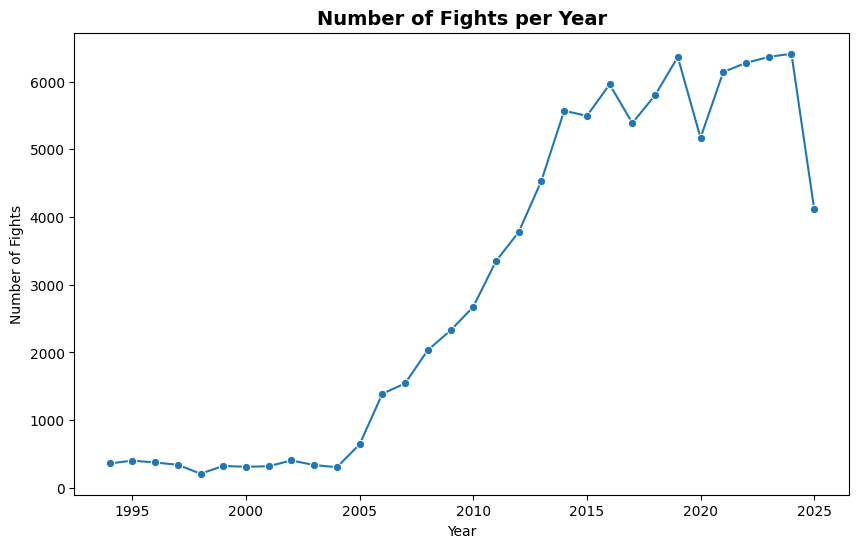

In [ ]:
# Query 4: Number of Fights per Year (Seaborn)
query4 = """
SELECT EXTRACT(YEAR FROM e.date)::INT AS year,
       COUNT(*) AS num_fights
FROM fights f
JOIN events e ON f.event_id = e.event_id
GROUP BY year
ORDER BY year;
"""
df4 = pd.read_sql(query4, conn)

plt.figure(figsize=(10,6))
sns.lineplot(df4, x = 'year', y = 'num_fights', marker = 'o')
plt.title('Number of Fights per Year', fontsize = 14, weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Number of Fights')

In [ ]:
# Query 4: Number of Fights per Year (Plotly)
query4 = """
SELECT EXTRACT(YEAR FROM e.date)::INT AS year,
       COUNT(*) AS num_fights
FROM fights f
JOIN events e ON f.event_id = e.event_id
GROUP BY year
ORDER BY year;
"""
df4 = pd.read_sql(query4, conn)

fig4 = px.line(
    df4, x = 'year', y = 'num_fights',
    title = 'Fights Per Year',
    markers = True,
    color_discrete_sequence = ['#1f77b4']
)


/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/493229501.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Step 7(e): Visualising Query 5

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/3785816061.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



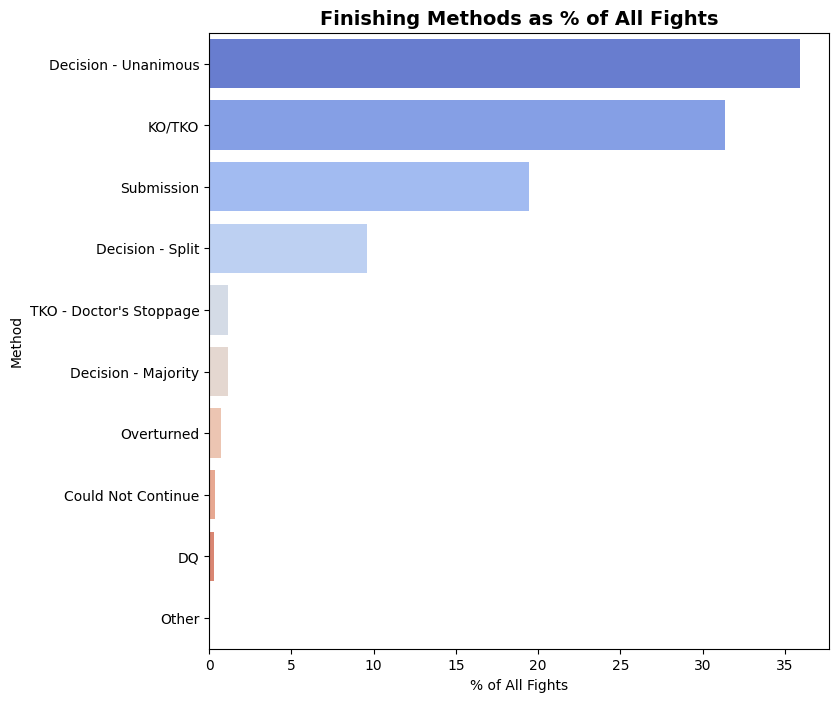

In [ ]:
# Query 5 : Finish Method Counts + Percentage (Seaborn)
query5 = """
SELECT COALESCE(method,'Unknown') AS method,
       COUNT(*) AS cnt,
       ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM fights), 2) AS pct_of_all_fights
FROM fights
GROUP BY COALESCE(method,'Unknown')
ORDER BY cnt DESC;
"""
df5 = pd.read_sql(query5, conn)

plt.figure(figsize=(8,8))
sns.barplot(df5, x = 'pct_of_all_fights', y = 'method', hue = 'method', palette="coolwarm")
plt.title('Finishing Methods as % of All Fights', fontsize = 14, weight = 'bold')
plt.xlabel('% of All Fights')
plt.ylabel('Method')

In [ ]:
# Query 5 : Finish Method Counts + Percentage (Plotly)
query5 = """
SELECT COALESCE(method,'Unknown') AS method,
       COUNT(*) AS cnt,
       ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM fights), 2) AS pct_of_all_fights
FROM fights
GROUP BY COALESCE(method,'Unknown')
ORDER BY cnt DESC;
"""
df5 = pd.read_sql(query5, conn)

fig5 = px.bar(
    df5, x = 'method', y = 'cnt',
    title = 'Finish Methods and Percentages',
    color = 'pct_of_all_fights',
    color_continuous_scale = px.colors.sequential.Plasma
)


/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/4201325379.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Step 7(f): Visualising Query 6

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/1409259043.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



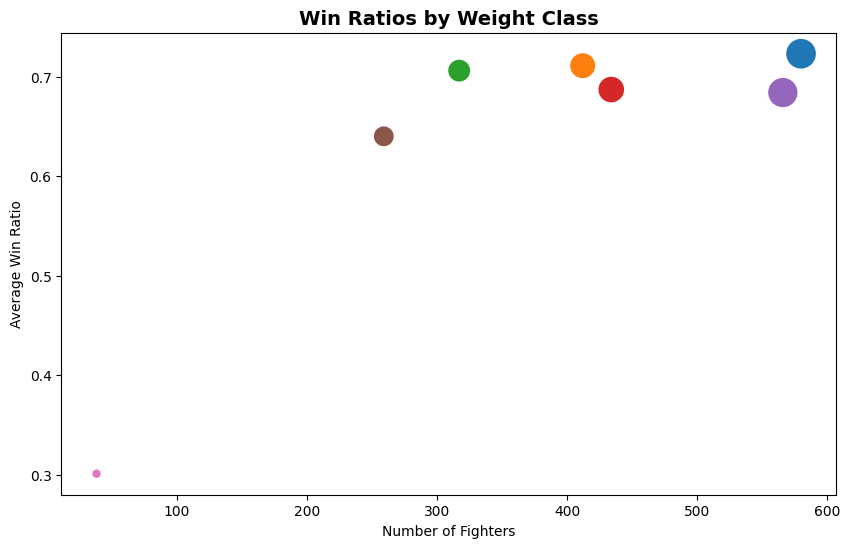

In [ ]:
# Query 6 : Win Ratios by Weight Class (Seaborn)
query6 = """
SELECT weight_class, COUNT(*) AS n_fighters, ROUND(AVG(win_ratio)::numeric,3) AS avg_win_ratio
FROM fighters
GROUP BY weight_class
HAVING COUNT(*) >= 5
ORDER BY avg_win_ratio DESC;
"""
df6 = pd.read_sql(query6, conn)

plt.figure(figsize=(10,6))
sns.scatterplot(df6, x = 'n_fighters', y = 'avg_win_ratio', size = 'n_fighters',
                hue = 'weight_class', palette = 'tab10', legend = False, sizes = (50, 500))
plt.title('Win Ratios by Weight Class', fontsize = 14, weight = 'bold')
plt.xlabel('Number of Fighters')
plt.ylabel('Average Win Ratio')


In [ ]:
# Query 6 : Win Ratios by Weight Class (Plotly)
query6 = """
SELECT weight_class, COUNT(*) AS n_fighters, ROUND(AVG(win_ratio)::numeric,3) AS avg_win_ratio
FROM fighters
GROUP BY weight_class
HAVING COUNT(*) >= 5
ORDER BY avg_win_ratio DESC;
"""
df6 = pd.read_sql(query6, conn)

fig6 = px.scatter(
    df6, x = 'n_fighters', y = 'avg_win_ratio', size = 'n_fighters',
    color = 'weight_class',
    title = 'Average Win Ratio by Weight Class',
    color_discrete_sequence = px.colors.qualitative.Bold
)


/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/3308948811.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Step 7(g): Visualising Query 7

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/1904151488.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



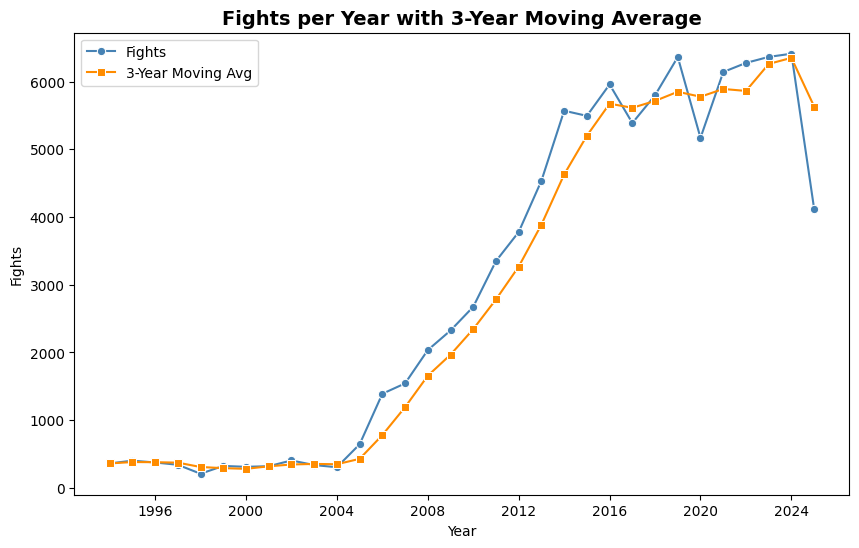

In [ ]:
# Query 7 : Fights per Year + 3-Year Moving Average (Seaborn)
query7 = """
WITH per_year AS (
  SELECT DATE_TRUNC('year', e.date)::date AS year,
         COUNT(*) AS num_fights
  FROM fights f
  JOIN events e ON f.event_id = e.event_id
  GROUP BY year
)
SELECT year,
       num_fights,
       ROUND(AVG(num_fights) OVER (ORDER BY year ROWS BETWEEN 2 PRECEDING AND CURRENT ROW)::numeric,2) AS ma_3yr
FROM per_year
ORDER BY year;
"""
df7 = pd.read_sql(query7, conn)

plt.figure(figsize=(10,6))
sns.lineplot(df7, x = 'year', y = 'num_fights', marker = 'o', label = 'Fights', color = 'steelblue')
sns.lineplot(df7, x = 'year', y = 'ma_3yr', marker = 's', label = '3-Year Moving Avg', color = 'darkorange')
plt.title('Fights per Year with 3-Year Moving Average', fontsize = 14, weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Fights')
plt.legend()

In [ ]:
# Query 7 : Fights per Year + 3-Year Moving Average (Plotly)
query7 = """
WITH per_year AS (
  SELECT DATE_TRUNC('year', e.date)::date AS year,
         COUNT(*) AS num_fights
  FROM fights f
  JOIN events e ON f.event_id = e.event_id
  GROUP BY year
)
SELECT year,
       num_fights,
       ROUND(AVG(num_fights) OVER (ORDER BY year ROWS BETWEEN 2 PRECEDING AND CURRENT ROW)::numeric,2) AS ma_3yr
FROM per_year
ORDER BY year;
"""
df7 = pd.read_sql(query7, conn)

fig7 = px.line(
    df7, x = 'year', y = ['num_fights', 'ma_3yr'],
    title = 'Fights Per Year with 3-Year Moving Average',
    markers = True,
    color_discrete_sequence = ['#ff7f0e', '#2ca02c']
)

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_5859/241783645.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

